In [85]:
import numpy as num
import pylab as lab
import matplotlib.pyplot as plt
import pandas as pan

In [3]:
from sklearn import linear_model


In [4]:
reg=linear_model.LinearRegression()
reg.fit([[0,0],[1,1],[2,2]],[0,1,2])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [5]:
reg.coef_

array([0.5, 0.5])

In [6]:
reg.intercept_

1.1102230246251565e-16

In [7]:
regRidge=linear_model.Ridge()

In [8]:
regRidge.alpha=0.5
regRidge.fit([[0,0],[1,1],[2,2]],[0,1,2])

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [9]:
regRidge.coef_,regRidge.intercept_

(array([0.44444444, 0.44444444]), 0.11111111111111116)

## Classification

For classification, as in the labeling iris task, linear regression is not the right approach as it will give too much weights to the data far from the decision frontier. A linear approach is to fit a sigmod funcion or logistic fucntion

$$y=sigmoid(X\beta-offset)+\epsilon=\frac{1}{1+\exp(-X\beta + offset)}+\epsilon$$

In [10]:
log=linear_model.LogisticRegression(solver='lbfgs',C=1e5,multi_class='multinomial')

In [11]:
from sklearn import datasets
iris=datasets.load_iris()
iris_X=iris.data
iris_y=iris.target


In [12]:
num.random.seed(0)
indices=num.random.permutation(len(iris_X))
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test = iris_X[indices[-10:]]
iris_y_test = iris_y[indices[-10:]]

In [13]:
help(linear_model.LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model.logistic:

class LogisticRegression(sklearn.base.BaseEstimator, sklearn.linear_model.base.LinearClassifierMixin, sklearn.linear_model.base.SparseCoefMixin)
 |  LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='warn', max_iter=100, multi_class='warn', verbose=0, warm_start=False, n_jobs=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the cross-
 |  entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 'sag' and 'lbfgs' solvers. It c

In [14]:
log.fit(iris_X_train,iris_y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=None, penalty='l2',
          random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False)

In [15]:
log.predict(iris_X_test),iris_y_test

(array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0]), array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0]))

In [16]:
log.predict_proba(iris_X_test)

array([[4.64095772e-08, 9.99988145e-01, 1.18090442e-05],
       [2.08290156e-11, 2.11068316e-01, 7.88931684e-01],
       [5.76927941e-12, 9.99810641e-01, 1.89359089e-04],
       [1.00000000e+00, 4.77285124e-12, 2.57964494e-36],
       [1.00000000e+00, 3.83638508e-11, 6.52284417e-33],
       [9.99999944e-01, 5.64219520e-08, 1.27425122e-30],
       [1.07851175e-19, 2.93453472e-04, 9.99706547e-01],
       [3.96902019e-09, 9.99999870e-01, 1.26070139e-07],
       [4.87953747e-23, 8.82869528e-08, 9.99999912e-01],
       [9.99999984e-01, 1.59778123e-08, 1.53573775e-30]])

## Classifying the digits

In [17]:
from sklearn import datasets
import time
digits=datasets.load_digits()
digits_X=digits.data/digits.data.max()
digits_y=digits.target

In [18]:
num.random.seed(0)
indices=num.random.permutation(len(digits_X))
digits_X_train = digits_X[indices[:-10]]
digits_y_train = digits_y[indices[:-10]]
digits_X_test = digits_X[indices[-10:]]
digits_y_test = digits_y[indices[-10:]]

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn=KNeighborsClassifier()

In [21]:
help(knn)

Help on KNeighborsClassifier in module sklearn.neighbors.classification object:

class KNeighborsClassifier(sklearn.neighbors.base.NeighborsBase, sklearn.neighbors.base.KNeighborsMixin, sklearn.neighbors.base.SupervisedIntegerMixin, sklearn.base.ClassifierMixin)
 |  KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, optional (default = 5)
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : str or callable, optional (default = 'uniform')
 |      weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of t

In [22]:
s=time.time()
knn.fit(digits_X_train,digits_y_train)
e=time.time()
print(e-s)
knn.score(digits_X_train,digits_y_train)

0.1060183048248291


0.9904868494683827

In [23]:

knn.predict(digits_X_test)

array([1, 4, 8, 4, 5, 3, 3, 7, 7, 8])

In [24]:
digits_y_test

array([1, 4, 8, 4, 5, 3, 3, 7, 7, 8])

### Trying logistic regression for the classification of digits

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
log=LogisticRegression()
log.multi_class='multinomial'
log.solver='lbfgs'
log.max_iter=500
log.C=1e4
log.random_state=0
log.warm_start=True


In [27]:
s=time.time()
log.fit(digits_X_train,digits_y_train)
e=time.time()
print(e-s)
log.score(digits_X_train,digits_y_train)

1.1144707202911377


1.0

In [28]:
help(log)

Help on LogisticRegression in module sklearn.linear_model.logistic object:

class LogisticRegression(sklearn.base.BaseEstimator, sklearn.linear_model.base.LinearClassifierMixin, sklearn.linear_model.base.SparseCoefMixin)
 |  LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='warn', max_iter=100, multi_class='warn', verbose=0, warm_start=False, n_jobs=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the cross-
 |  entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 'sag' and 'lbfgs' solvers. It 

In [29]:
log.predict(digits_X_test)

array([1, 4, 8, 4, 5, 3, 3, 7, 7, 8])

In [30]:
digits_y_test

array([1, 4, 8, 4, 5, 3, 3, 7, 7, 8])

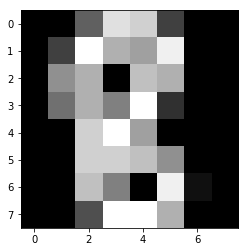

In [31]:
im=digits_X_test[-1].reshape(8,8)
lab.imshow(im,cmap='gray')
lab.show()

## Support vector Machine

In [32]:
from sklearn import svm

svm=svm.SVC(kernel='linear')
svm.C=1e3
svm.random_state=0
help(svm)

Help on SVC in module sklearn.svm.classes object:

class SVC(sklearn.svm.base.BaseSVC)
 |  SVC(C=1.0, kernel='rbf', degree=3, gamma='auto_deprecated', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time complexity
 |  is more than quadratic with the number of samples which makes it hard
 |  to scale to dataset with more than a couple of 10000 samples.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  other, see the corresponding section in the narrative documentation:
 |  :ref:`svm_kernels`.
 |  
 |  Read more in the :ref:`User Guide <svm_classification>`.
 |  
 |  Parameters
 |  ----------
 |

In [33]:
svm.fit(iris_X_train,iris_y_train)

SVC(C=1000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [34]:
svm.predict(iris_X_test)

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [35]:
iris_y_test

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

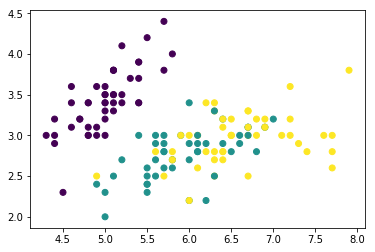

In [36]:
lab.scatter(iris_X_train[:,0],iris_X_train[:,1],c=iris_y_train)
lab.show()

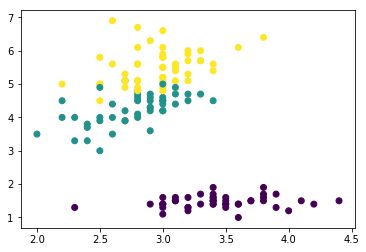

In [37]:
lab.scatter(iris_X_train[:,1],iris_X_train[:,2],c=iris_y_train)
lab.show()

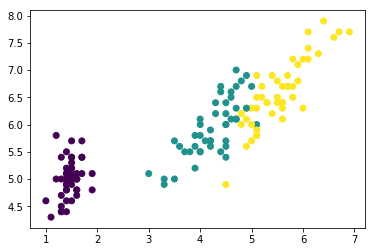

In [38]:
lab.scatter(iris_X_train[:,2],iris_X_train[:,0],c=iris_y_train)
lab.show()

In [39]:
svm.kernel='rbf'
svm.C=1
svm.gamma='scale'
svm.fit(iris_X_train[:,1:],iris_y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [40]:
svm.predict(iris_X_test[:,1:])

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

In [41]:
iris_y_test

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

In [44]:
svm.kernel='rbf'
svm.C=1000
svm.gamma='scale'
svm.fit(iris_X_train[:,[0,2]],iris_y_train)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [45]:
svm.predict(iris_X_test[:,[0,2]])

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [46]:
svm.get_params

<bound method BaseEstimator.get_params of SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)>

## Use of cross validation

In [47]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
dat=iris_X

In [48]:
k_fold=KFold(n_splits=5)
log=LogisticRegression()
log.solver='lbfgs'
log.multi_class='multinomial'
log.C=1e5
log.max_iter=500

In [49]:
score=[]
for train_indices,test_indices in k_fold.split(dat):
    score.append(log.fit(dat[train_indices],iris_y[train_indices]).score(dat[test_indices],iris_y[test_indices]))
    

In [50]:
help(log)

Help on LogisticRegression in module sklearn.linear_model.logistic object:

class LogisticRegression(sklearn.base.BaseEstimator, sklearn.linear_model.base.LinearClassifierMixin, sklearn.linear_model.base.SparseCoefMixin)
 |  LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='warn', max_iter=100, multi_class='warn', verbose=0, warm_start=False, n_jobs=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the cross-
 |  entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 'sag' and 'lbfgs' solvers. It 

In [51]:
print(score)

[1.0, 1.0, 0.8333333333333334, 0.9666666666666667, 0.8333333333333334]


## Simple use of cross_val_score

In [52]:
cross_val_score(log,iris_X,iris_y,cv=k_fold,n_jobs=1)

array([1.        , 1.        , 0.83333333, 0.96666667, 0.83333333])

## Different cross validation generator

### KFold (n_split, shuffle, random_state)
splits it into K fold, trains on K-1 and then test on the left-out
### StratifiedKFold(n_splits, shuffle, random_state)
Same as KFold but preserves the class distribution within each fold
### GroupKFold(n_splits)
Ensures that the same group is not in both testing and training sets
### ShuffleSplit(n_splits,test_size,train_size,random_state)
Generates train/test indices based on random permutations
### StratifitedShuffleSplit()
Same as shuffle split but preserves the class distribution within each iterations
### GroupShuffleSplit
ensures that the group is not the testing and training sets
### LeaveOneGropuOut()
takes a group array to group observations
### LeavePGroupOut(n-groups)
Leaves n groups out
### LeaveOneOut()
Leave one observation out
### LeavePOut(p)
leave p obervations out
### PredefinedSplit
Generates train/test indices based on predefiend splits.

In [56]:
import numpy as np
from sklearn.model_selection import cross_val_score,KFold
from sklearn import datasets, svm
digits = datasets.load_digits()
X = digits.data
y = digits.target
svc = svm.SVC(kernel='linear')
C_s = np.logspace(-10, 0, 10)
C_s

array([1.00000000e-10, 1.29154967e-09, 1.66810054e-08, 2.15443469e-07,
       2.78255940e-06, 3.59381366e-05, 4.64158883e-04, 5.99484250e-03,
       7.74263683e-02, 1.00000000e+00])

In [94]:
kfold=KFold(n_splits=5)

In [95]:
score=[]
for var in C_s:
    svc.C=var
    s=cross_val_score(svc,X,y,cv=kfold,n_jobs=1)
    score.append(s)
score=num.matrix(score)

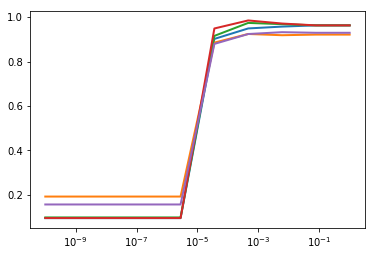

In [96]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
for var in range(5):
    ax.plot(C_s,score[:,var],lw=2)
ax.set_xscale('log')
plt.show()

## Grid Search 
Scikit learn provides an object that, given data, computers the score during the fit of an estimator on a parameter grid and chooses the parameter to maximize the cross-validation score. This object takes an estimator during the construction and exposes an estimator API

In [97]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [98]:
Cs=num.logspace(-6,-1,10)

In [99]:
clf=GridSearchCV(estimator=svc,param_grid=dict(C=Cs),n_jobs=1)

In [100]:
clf.fit(digits_X_train,digits_y_train)

/home/manu/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/manu/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'C': array([1.00000e-06, 3.59381e-06, 1.29155e-05, 4.64159e-05, 1.66810e-04,
       5.99484e-04, 2.15443e-03, 7.74264e-03, 2.78256e-02, 1.00000e-01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [101]:
clf.best_score_

0.9776161163961947

In [102]:
clf.best_estimator_.C

0.1